# Predicting Employee Attrition: A Data-driven Approach

## Introduction

Employee attrition, defined as the process of employees leaving a company, whether voluntarily or involuntarily, poses significant challenges for businesses. It impacts hiring costs, productivity, and overall workplace dynamics. Understanding the reasons behind employee departures is essential for effectively addressing this issue [2].


This project aims to predict employee attrition using a dataset containing various employee-related information. We've selected this dataset as the foundation for our analysis. Our objective is to determine if specific factors within this dataset can accurately predict whether an employee will leave the company.


You can access the dataset here: [Employee_Dataset](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data). It includes employee salary, department, education, work-life balance, job satisfaction, tenure, and age.
Our objective is to develop a predictive model using Age and Monthly Income to forecast whether an employee will leave a company and assess its accuracy in predicting employee attrition.


**Predictive Question**: Can Age and Monthly Income accurately predict employee attrition in a company?



# Methods

Our dataset aims to investigate how **Monthly_Income** and **Age** are associated with **Attrition**. In the Attrition column, Attrition is categorized as "Yes" (indicating an employee has left the company) or "No" (indicating the employee is still with the company). We'll focus exclusively on these three variables for our analysis.

1. **Monthly_Income**: Monthly Income of the Employee
2. **Age**: Age of the Employee
3. **Attrition**

Given that Attrition is categorical, we'll employ a classification approach using the K-nearest neighbours (KNN) algorithm. Our model will be constructed using Monthly_Income and Age as predictors. Our methodology includes:

- Data preprocessing.
- Splitting the data into training and testing sets.
- Standardizing the data.
- Building the KNN model.
- Evaluating its performance via cross-validation to identify the optimal K value.


Subsequently, the classifier will be fine-tuned using the selected K value, and its performance will be evaluated on the test dataset using a confusion matrix. A bar graph will be created to illustrate the distribution of correct and incorrect predictions made by the model. Additionally, these predictions will be visualized on a scatter plot to provide a more detailed analysis.

We will use Jupyter and R to load essential packages like tidyverse and tidy models. We'll import and clean the dataset by selecting necessary variables, converting Attrition into a factor, and adjusting column names to follow R coding conventions. We'll set a seed and then split the data into training and testing sets to ensure reproducibility. Using the training data, we'll calculate the percentage of Attrition, determine the number of rows in the dataset, and visualize the distribution of employees based on age and monthly income using a histogram.



# Preprocessing and exploratory data analysis


In [3]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──


**Loading Data**

In [4]:
# Reading data from the file
employee_url <- "https://raw.githubusercontent.com/Chadha-Bhavya/DSCI-100-Group-Project/main/HR_Analytics.csv.csv"
employee <- read_csv(employee_url)
employee |> head(5)

Rows: 1470 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2


**Table 1 : Wrangled data**

In [5]:
# Selecting the necessary columns and mutating the name of the column
# using the R convention and mutating the Attrition column to a factor

# Dropping Na Values

employee <- employee |>
         select(Attrition, MonthlyIncome, Age) |>
         mutate(Attrition = as_factor(Attrition)) |>
         rename(Monthly_Income = MonthlyIncome) |>
         drop_na() 

employee |> head(5)

Attrition,Monthly_Income,Age
<fct>,<dbl>,<dbl>
Yes,5993,41
No,5130,49
Yes,2090,37
No,2909,33
No,3468,27


The table above shows the first 5 rows of the necessary columns from the original dataset. The columns it contains are "Attrition", "Monthly_Income", and "Age".

**Splitting data into Training and Testing data**

In [6]:
# Setting the seed for reproducibility 
set.seed(1000)

# Splitting data into 75% training data and 25% testing data
employee_split <- initial_split(employee, prop = 0.75, strata = Attrition)
employee_train <- training(employee_split)
employee_test <- testing(employee_split) 

**Examining number of rows in data set**

In [7]:
#Finding number of rows in the dataset
nrow(employee_train)

[1] 1101

**Table 2: Proportions of attrition in data set**

In [8]:
employee_proportions <- employee_train |>
                      group_by(Attrition) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(employee_train))
employee_proportions

Attrition,n,percent
<fct>,<int>,<dbl>
Yes,177,16.07629
No,924,83.92371


Table 2 shows that 16.08% of employees from the training set have left the company, and 83.92% of the employees from the training set are still working for the company. 

**Table 3: Mean monthly income and mean age with regard to attrition**

In [9]:
mean_statistics <- employee_train |>
              group_by(Attrition) |>
              summarize(mean_monthly_income = mean(Monthly_Income), mean_age = mean(Age))

mean_statistics

Attrition,mean_monthly_income,mean_age
<fct>,<dbl>,<dbl>
Yes,4546.571,33.27119
No,6891.736,37.79437


Table 3 shows a clear difference in mean age and in mean monthly income seperating employees 
who have left the company or not. Given the notable disparity in these figures between employees who have left the company or not, we can infer that training a classifier on monthly income and age 
can effectively predict whether an employee will leave the company or not. 

**Plot 1: Scatterplot showing Monthly Income vs Age**

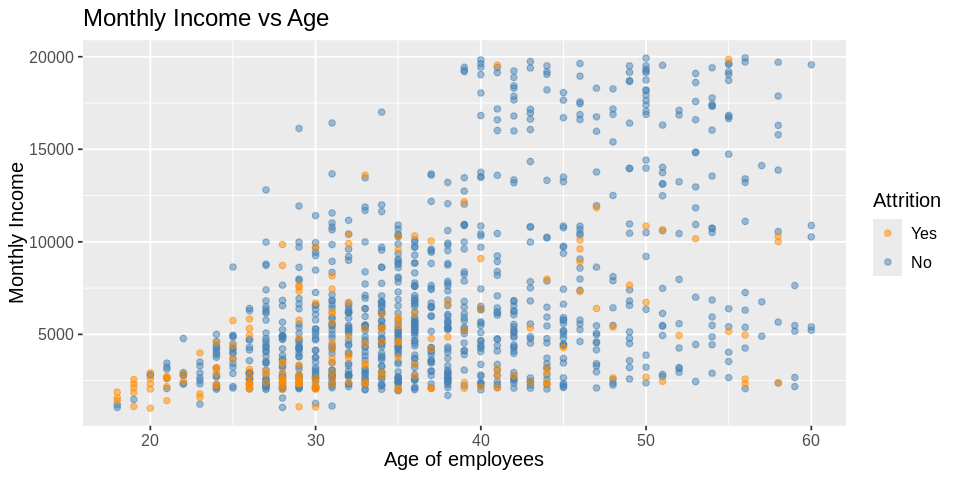

In [10]:
options(repr.plot.width = 8, repr.plot.height = 4)

age_vs_income_plot <- employee_train |>
                      ggplot(aes(x = Age, y = Monthly_Income, color = Attrition)) +
                      geom_point(alpha = 0.5) +
                      labs(x = "Age of employees", y = "Monthly Income", color = "Attrition") +
                      theme(text = element_text(size = 12)) +
                      scale_color_manual(values = c("darkorange", "steelblue"))+
                      ggtitle("Monthly Income vs Age")
age_vs_income_plot

Based on Plot 1 above, we can see that most employees who left the company (coloured with orange) were younger and had lower monthly incomes than other employees. The employees who stayed at the company (coloured blue) were mainly older and had a higher monthly income. 

The differences in age and monthly income between employees who stayed at the company compared to  employees who left shows that these categories will provide a good prediction for whether an employee will leave a company or not. 


# KNN classification


**Creating a recipe with the training data**

In [11]:
recipe_train <- recipe(Attrition ~ Age + Monthly_Income , data = employee_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

**Creating a classification model with tuning for K**

In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

**Performing a 5-fold cross-validation on the training set**

In [13]:
vfold5 <- vfold_cv(employee_train, v = 5, strata = Attrition)

**Creating a workflow analysis from k=2 to k=50, skipping by 2, with the recipe and model 
specification. Collecting the metrics from the workflow analysis and filtering for accuracy.**

In [14]:
k_values <- tibble(neighbors=seq(from=2, to=50, by=2))

knn_metrics <- workflow() |>
       add_recipe(recipe_train) |>
       add_model(knn_spec) |>
       tune_grid(resamples = vfold5, grid= k_values)|>
       collect_metrics()

accuracy <- knn_metrics |>
  filter(.metric == "accuracy")

**Plot 2: Accuracy Estimate vs K values**

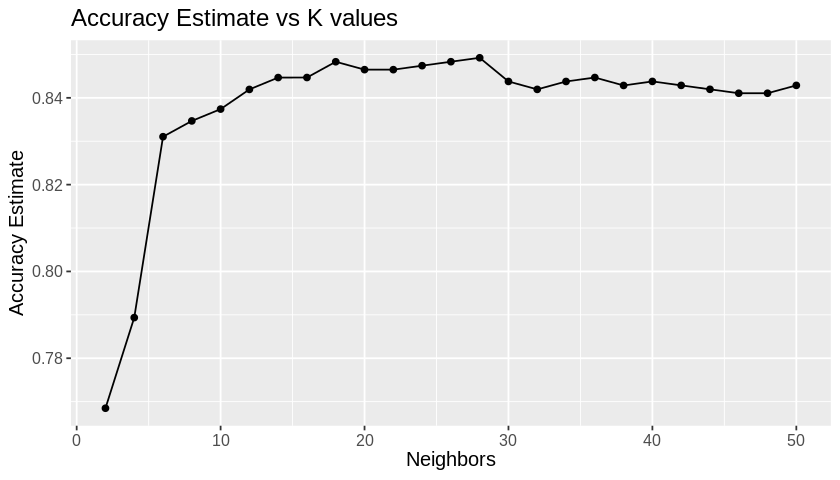

In [15]:
options(repr.plot.width = 7, repr.plot.height = 4)

accuracy_k_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                   geom_point() +
                   geom_line() +
                   labs(x = "Neighbors", y = "Accuracy Estimate") +
                   theme(text = element_text(size = 12))+
                   ggtitle("Accuracy Estimate vs K values")

accuracy_k_plot

In [16]:
best_k <- accuracy |>
          arrange(desc(mean)) |>
          head(1) |>
          pull(neighbors)
best_k

[1] 28

From the plot of best K values and sorting K values for the highest accuracy, as shown above, we can see that the optimal K value for the prediction is K=28 since it has the highest accuracy value.

(Note: the plot above only shows K values evaluated from K=2 to 50. We also assessed K values from k=2 to 100, but the accuracy values plateaued after approximately 50, and the code was taking too long to run with 100 K values, so we are only showing up to K=50 here.)


**Using the model to predict employee attrition using the K value of 28 that we found above. Finding the accuracy of the model and creating a confusion matrix to assess the model's performance.**

In [17]:
k_final <- 28

knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = k_final) |>
            set_engine("kknn") |>
            set_mode("classification")

trial_fit <- workflow() |>
             add_recipe(recipe_train) |>
             add_model(knn_spec) |>
             fit(data = employee_train)

trial_predictions <- predict(trial_fit , employee_test) |>
                     bind_cols(employee_test)

trial_prediction_accuracy <- trial_predictions |>
                             metrics(truth = Attrition, estimate = .pred_class) |>
                             filter(.metric == "accuracy")
trial_prediction_accuracy

confusion_matrix <- trial_predictions |>
                    conf_mat(truth = Attrition, estimate = .pred_class)

confusion_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8211382


          Truth
Prediction Yes  No
       Yes   4  10
       No   56 299

As shown above, our model's accuracy is 82.11%. This value is satisfactory for our purposes, as predicting employee attrition depends on many factors. Many of these factors were not tested with our model since we only tested two factors that affect attrition. 

If we had chosen more factors for our prediction model, the accuracy would likely be higher. Based on the number above, our model can predict if employees will leave their company with over 80% accuracy.


**Plots 3 and 4: examining the difference between predicted attrition and actual attrition**

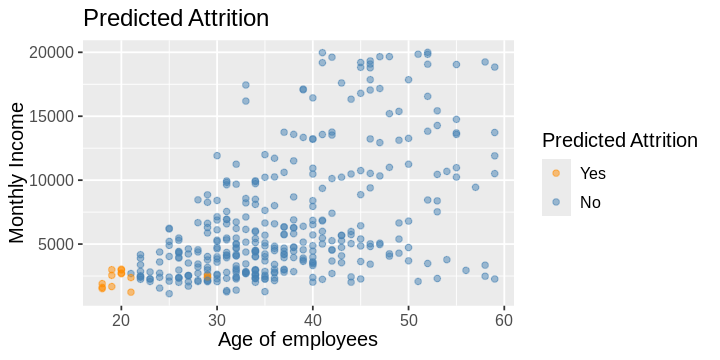

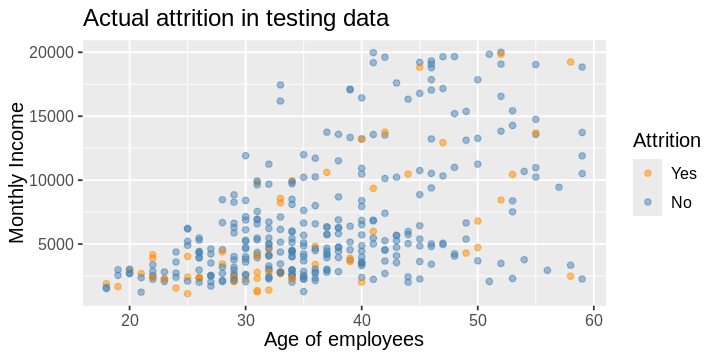

In [18]:
options(repr.plot.width = 6, repr.plot.height = 3)

pred_attrition_plot <- trial_predictions |>
                       ggplot(aes(x = Age, y = Monthly_Income, color = .pred_class)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "Age of employees",
                            y = "Monthly Income",
                            color = "Predicted Attrition") +
                       theme(text = element_text(size = 12)) +
                       scale_color_manual(values = c("darkorange", "steelblue"))+
                       ggtitle("Predicted Attrition")
pred_attrition_plot


options(repr.plot.width = 6, repr.plot.height = 3)

actual_attrition_plot <- employee_test |>
                         ggplot(aes(x = Age, y = Monthly_Income, color = Attrition)) +
                         geom_point(alpha = 0.5) +
                         labs(x = "Age of employees",
                              y = "Monthly Income",
                              color = "Attrition") +
                         theme(text = element_text(size = 12)) +
                         scale_color_manual(values = c("darkorange", "steelblue"))+
                         ggtitle("Actual attrition in testing data")
actual_attrition_plot

As shown in plots 3 and 4 above, our prediction falsely estimated that many younger employees with lower monthly incomes would leave their jobs. It also did not correctly estimate that many of the older employees with higher monthly incomes would leave the company.


**Plot 5: Visualizing the Confusion Matrix**

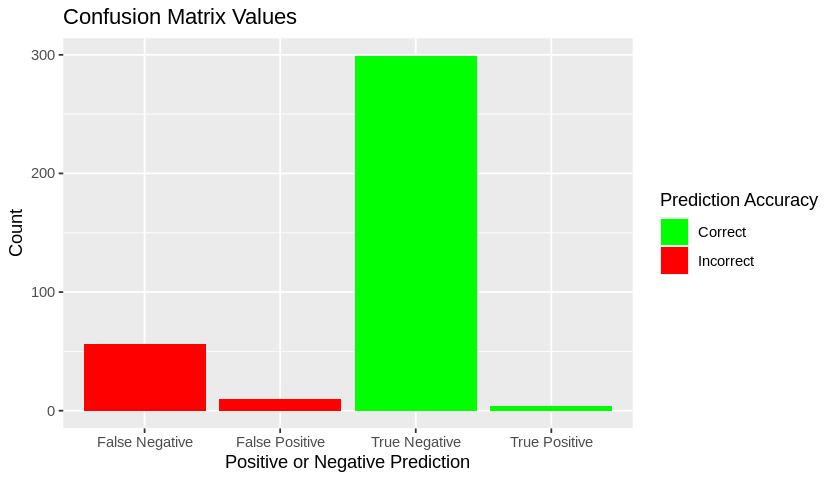

In [19]:
options(repr.plot.width = 7, repr.plot.height = 4)

matrix_tibble <- tibble("True Positive"=4, "False Positive"=10, "False Negative"=56, "True Negative"=299)

wrangled_matrix <- pivot_longer(matrix_tibble, cols="True Positive":"True Negative", names_to="label", values_to="number")|>
                   mutate(Correctness = ifelse(label %in% c("True Positive", "True Negative"), 
                                               "Correct", 
                                               "Incorrect"))

matrix_hist <- ggplot(wrangled_matrix, aes(x = label, y = number, fill = Correctness)) +
               geom_bar(stat = "identity") +
               scale_fill_manual(values = c("Correct" = "green", "Incorrect" = "red")) +
               labs(x = "Positive or Negative Prediction", y = "Count", title = "Confusion Matrix Values", fill = "Prediction Accuracy")

matrix_hist

As shown by the visualization of the confusion matrix above, our predictor mainly correctly predicted employees who would not leave the company. However, as shown by the low number of true positives, the predictor was not able to correctly predict many of the employees who did choose to leave the company.


**Plot 6: Visualizing Prediction Accuracy on Scatterplot**

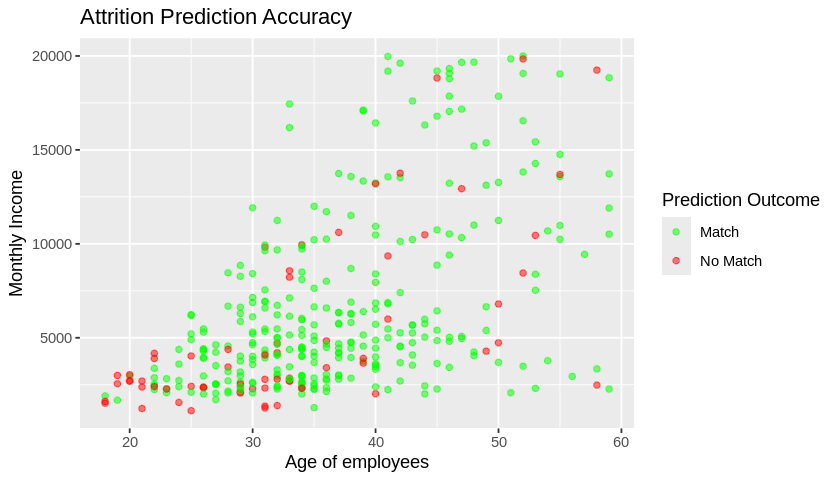

In [20]:
combined_data <- trial_predictions |>
                 mutate(Correctness = ifelse(Attrition == .pred_class, 
                                             "Match", 
                                             "No Match"))


pred_vs_actual_plot <- ggplot(combined_data, aes(x = Age, y = Monthly_Income, color = Correctness)) +
                       geom_point(alpha = 0.5) +
                       scale_color_manual(values = c("Match" = "green", "No Match" = "red")) +
                       labs(title = "Attrition Prediction Accuracy", 
                            x = "Age of employees", 
                            y = "Monthly Income",
                            color = "Prediction Outcome")

pred_vs_actual_plot

The Attrition Prediction Accuracy plot above shows that the prediction outcome is consistent with few errors. The only area where there were more frequent no-matches was within the 20-30 year age range. This result relates to our prediction, falsely estimating that many younger employees with lower monthly incomes would leave their jobs.


# Results

From our model, we selected the k value of 28 which gives an accuracy of 82.11%.

# Discussion

## Summary of Findings ##

The project successfully employed a K-Nearest Neighbors (KNN) model to predict employee attrition based on Age and Monthly Income. The results of our analysis revealed an accuracy rate of 82%, indicating that these two factors are highly predictive of attrition outcomes. 

The model was particularly effective in identifying employees who are likely to stay rather than those who are likely to leave. This was evident from a higher number of true negatives (employees who stayed) than true positives (employees who left) in the confusion matrix.


## Impact of the Findings ##

Understanding the factors that drive employee attrition can significantly affect how organizations manage and strategize their human resources. For example, companies can develop specific retention strategies like offering raises or career development opportunities primarily aimed at the group identified as more likely to leave. 

Additionally, by proactively tackling these attrition predictors, companies can cut down on recruitment expenses and prevent the loss of valuable knowledge. This helps sustain both productivity and employee morale. Furthermore, this proactive approach stabilizes the workforce and enhances the overall organizational climate.


## Reflections on Expectations ##

The study found that age and monthly income are good indicators of employee attrition. Initially, it was expected that younger employees with lower incomes might be more prone to leave their jobs to find better opportunities or higher pay elsewhere. The analysis confirmed this assumption to some extent, as the attrition predictions were found to be correlated with lower incomes and younger age demographics.


## Future Questions ##

The findings of this study lead to various paths for additional research:

- Inclusion of Additional Variables: How would adding variables like job satisfaction, work environment, or commute distance affect the model’s predictive accuracy? Including these factors could give a more complete understanding of employee attrition.
- Longitudinal Analysis: Could a long-term study reveal how attrition trends evolve within the same organization?
- Comparative Analysis Across Departments: How does attrition vary among different departments within a company? Exploring this could expose specific departmental challenges or achievements in keeping employees.
- Impact of External Economic Factors: How do external economic shifts affect attrition rates, like a recession or economic growth? This could show how more extensive economic conditions influence employee decisions to stay or leave.


These inquiries not only build on the existing research but also enhance the precision of attrition prediction models, making them more effective across various human resources contexts.


## References ##

- Kaggle Dataset: "Employee Attrition and Factors" (n.d.). Retrieved from https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data

- Dalton, D. R., & Todor, W. D. (1979). Turnover turned over: An expanded and positive perspective. Academy of Management Review, 4(2), 225-235. https://doi.org/10.5465/AMR.1979.4289021

- Li, J. (J.), Lee, T. W., Mitchell, T. R., Hom, P. W., & Griffeth, R. W. (2016). The effects of proximal withdrawal states on job attitudes, job searching, intent to leave, and employee turnover. Journal of Applied Psychology, 101(10), 1436–1456. https://doi.org/10.1037/apl0000147

- Maertz Jr, C. P., & Campion, M. A. (1998). 25 years of voluntary turnover research: A review and critique. In C. L. Cooper & I. T. Robertson (Eds.), International Review of Industrial and Organizational Psychology, 1998 (Vol. 13, pp. 49-81). Wiley. Available from https://books.google.ca/books?id=M5MtBgAAQBAJ